In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from lib import DihedralAdherence
from lib import PDBMineQuery
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from pathlib import Path
PDBMINE_URL = os.getenv("PDBMINE_URL")
PROJECT_DIR = 'tests'

In [ ]:
for casp_id in ['T1024', 'T1096', 'T1027', 'T1082', 'T1091', 'T1058', 'T1049', 'T1030', 'T1056', 'T1038', 'T1025', 'T1028']:
    try:
        da = DihedralAdherence(casp_id, [4,5,6,7], PDBMINE_URL, PROJECT_DIR, kdews=[1,32,64,128], mode='kde_af')
        da.load_results()
        da.compute_das(replace=True)
    except Exception as e:
        print(f"{casp_id} - Error: {e}")

Results already exist
Casp ID: T1096 	PDB: 7um1
Structure exists: 'pdb/pdb7um1.ent' 
Highest DA Differences:

|   pos |   pos_xray | seq_ctxt   |   da_pred |   da_xray |   da_diff |
|------:|-----------:|:-----------|----------:|----------:|----------:|
|   298 |          7 | GNSIINE    |  147.883  |  18.3719  |  129.511  |
|   297 |          6 | QGNSIIN    |  128.595  |   4.64872 |  123.947  |
|   387 |         96 | APNVRKM    |  136.115  |  20.2849  |  115.83   |
|   347 |         56 | SNKFKVN    |  111.685  |   6.30201 |  105.383  |
|   295 |          4 | NDQGNSI    |  103.562  |  11.8054  |   91.7562 |
|   447 |        156 | EVDFSTD    |   65.1664 |  11.4288  |   53.7376 |
|   327 |         36 | EFINGRE    |  158.692  | 116.874   |   41.8178 |
|   413 |        122 | LKSYLPI    |  146.826  | 110.932   |   35.8943 |
|   343 |         52 | KIYYSNK    |   40.7654 |   6.19327 |   34.5721 |
|   414 |        123 | KSYLPIK    |   45.1291 |  12.0673  |   33.0618 |


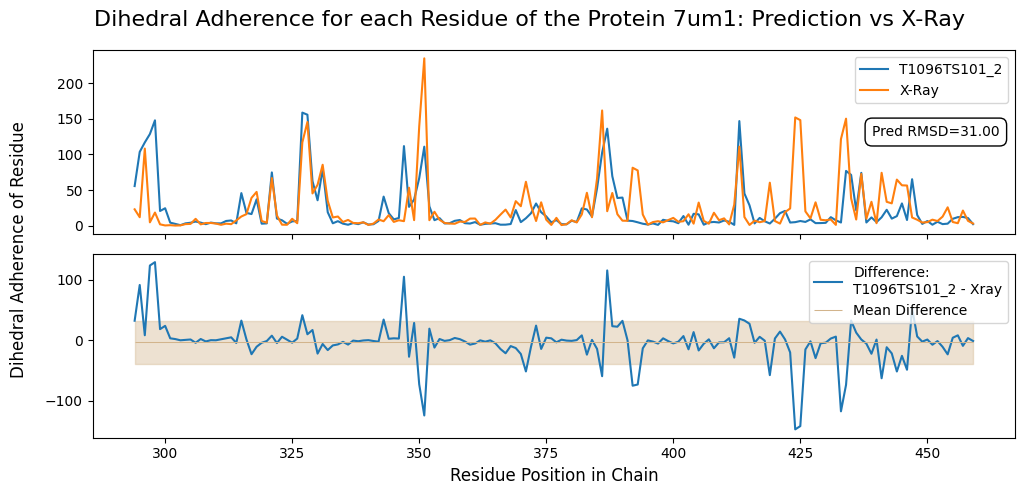

,pos,seq_ctxt,res,phi,psi,protein_id,da_pred,n_samples,da_no_scale,da_na,pos_xray,da_xray,da_diff
57,351,KVNSNKN,S,-80.567757,89.290676,T1096TS101_2,110.861375,1560.0,110.861375,False,60,234.881799,-124.020425
92,386,IAPNVRK,N,-57.379653,108.686057,T1096TS101_2,102.617857,1582.0,102.617857,False,95,161.712988,-59.095131
130,424,DKNNVIL,N,57.522599,52.121903,T1096TS101_2,4.905100,1930.0,4.905100,False,133,151.904098,-146.998998
140,434,TIKNAKF,N,-109.828178,54.065612,T1096TS101_2,76.830322,2224.0,76.830322,False,143,150.179932,-73.349610
131,425,KNNVILQ,V,-59.106513,-43.979083,T1096TS101_2,6.510898,2718.0,6.510898,False,134,148.130955,-141.620056
...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,378,IPEILSC,I,-62.315148,-42.554517,T1096TS101_2,2.100337,5047.0,2.100337,False,87,0.810570,1.289768
7,301,IINECSI,E,-65.936212,-11.466268,T1096TS101_2,4.217446,224.0,29.173619,False,10,0.642930,3.574516
9,303,NECSIKQ,S,-58.377191,-42.276218,T1096TS101_2,0.665223,193.0,5.340704,False,12,0.352473,0.312750
6,300,SIINECS,N,-56.712062,112.105377,T1096TS101_2,24.430074,246.0,153.878676,False,9,0.272632,24.157442


In [11]:
proteins = ['T1024', 'T1096', 'T1027', 'T1082', 'T1091', 'T1058', 'T1049', 'T1030', 'T1056', 'T1038', 'T1025', 'T1028']
da = DihedralAdherence(
    proteins[1], [4,5,6,7], PDBMINE_URL, PROJECT_DIR, kdews=[1,32,64,128], mode='kde_af'
)
# da.load_results()
da.load_results_da()
both = da.plot_res_vs_da()
both.sort_values('da_xray', ascending=False)
# da.compute_das(replace=True)

Max: P(-84.735376, -18.551532)=0.000121


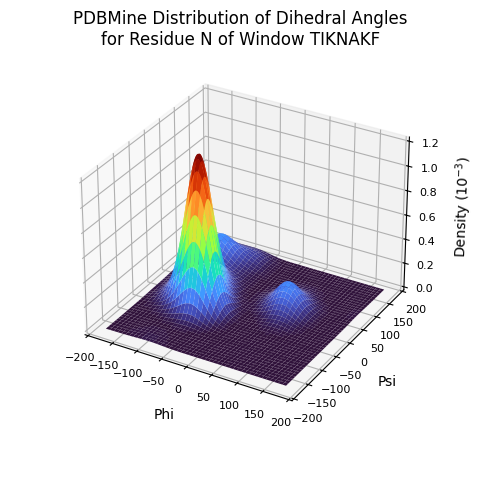

               phi          psi       weight      winsize
count  1712.000000  1712.000000  1712.000000  1712.000000
mean    -75.703621    34.652336     2.997079     4.063084
std      60.562028    71.343907     8.702935     0.263930
min    -179.900000  -179.900000     1.000000     4.000000
25%    -110.725000   -24.350000     1.000000     4.000000
50%     -88.400000    23.700000     1.000000     4.000000
75%     -65.100000    90.375000     1.000000     4.000000
max     179.700000   179.800000   128.000000     7.000000
Residue N of Window TIKNAKF centered at 143 of TIKNAKF
	Win 4: KNAK - 1611 samples
	Win 5: IKNAK - 96 samples
	Win 6: IKNAKF - 3 samples
	Win 7: TIKNAKF - 2 samples
	Found 3 Clusters
	KDEPEAK: Using kdepeak of entire distribution
Ideal:	 (-84.74, -18.55)
X-ray[143]:	 (-118.99, 127.67), DA=150.18
TS101_2[434]:	 (-109.83, 54.07), DA=76.83
AlphaFold[434]:	 (-79.74, -18.62), DA=5.00
Other Predictions DA:
                 0
count  411.000000
mean    51.620204
std     52.246026
m

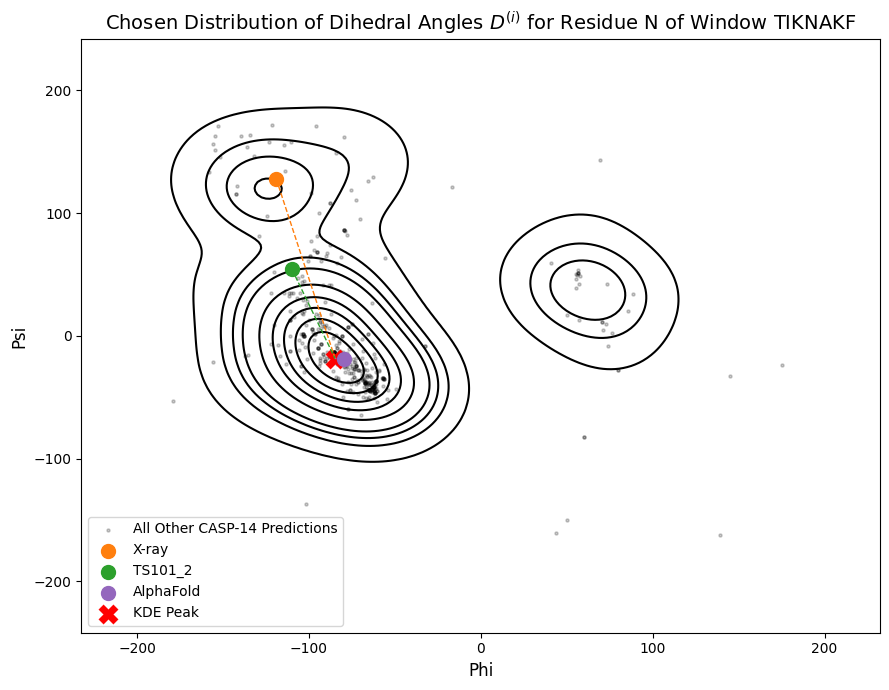

In [17]:
da.plot_one_dist_3d('TIKNAKF')
da.plot_da_for_seq('TIKNAKF')

Highest DA Differences:

|   pos |   pos_xray | seq_ctxt   |   da_pred |   da_xray |   da_diff |
|------:|-----------:|:-----------|----------:|----------:|----------:|
|   298 |          7 | GNSIINE    |  147.883  |  18.3719  |  129.511  |
|   297 |          6 | QGNSIIN    |  128.595  |   4.64872 |  123.947  |
|   387 |         96 | APNVRKM    |  136.115  |  20.2849  |  115.83   |
|   347 |         56 | SNKFKVN    |  111.685  |   6.30201 |  105.383  |
|   295 |          4 | NDQGNSI    |  103.562  |  11.8054  |   91.7562 |
|   447 |        156 | EVDFSTD    |   65.1664 |  11.4288  |   53.7376 |
|   327 |         36 | EFINGRE    |  158.692  | 116.874   |   41.8178 |
|   413 |        122 | LKSYLPI    |  146.826  | 110.932   |   35.8943 |
|   343 |         52 | KIYYSNK    |   40.7654 |   6.19327 |   34.5721 |
|   414 |        123 | KSYLPIK    |   45.1291 |  12.0673  |   33.0618 |


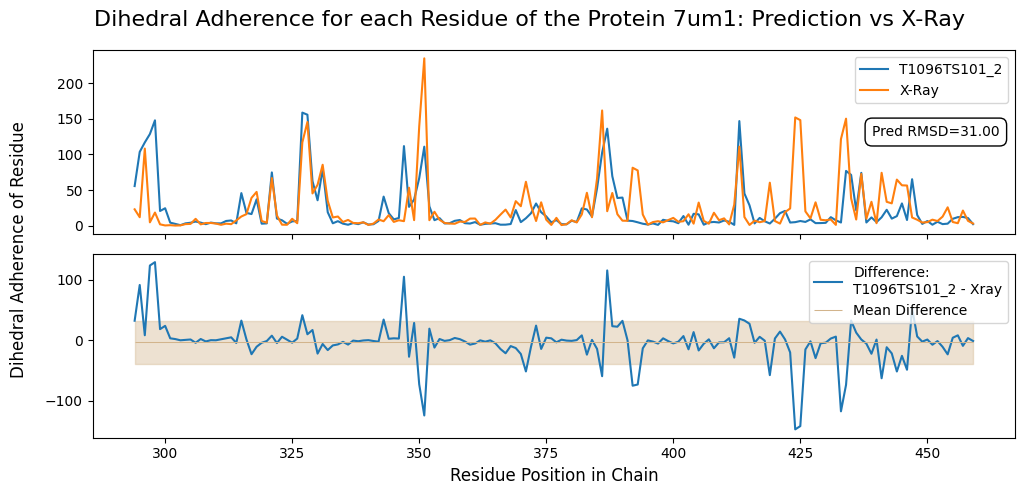

In [5]:
both = da.plot_res_vs_da()

# old method

Results already exist
Casp ID: T1096 	PDB: 7um1
Structure exists: 'pdb/pdb7um1.ent' 
Max: P(70.696379, 163.955432)=0.000080


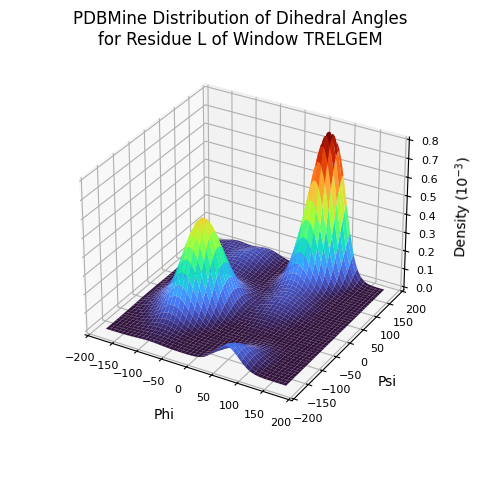

               phi          psi       weight      winsize
count  4513.000000  4513.000000  4513.000000  4513.000000
mean    -57.847662    15.629936     4.362508     4.107467
std      58.413662    84.198952    10.273638     0.320985
min    -169.600000  -179.800000     1.000000     4.000000
25%     -94.500000   -39.300000     1.000000     4.000000
50%     -69.400000   -19.400000     1.000000     4.000000
75%     -58.500000    98.600000     1.000000     4.000000
max     172.800000   179.900000   128.000000     7.000000
Residue L of Window TRELGEM centered at 76 of TRELGEM
	Win 4: ELGE - 4040 samples
	Win 5: RELGE - 465 samples
	Win 6: RELGEM - 4 samples
	Win 7: TRELGEM - 4 samples
Ideal:	 (70.70, 163.96)
X-ray[76]:	 (-68.55, -19.62), DA=224.76
TS427_1[367]:	 (-65.80, -35.91), DA=210.42
AlphaFold[367]:	 (-65.80, -35.91), DA=210.42
Other Predictions DA:
                 0
count  418.000000
mean   210.559571
std     26.241395
min     14.952206
25%    205.520732
50%    212.090035
75%    224.2

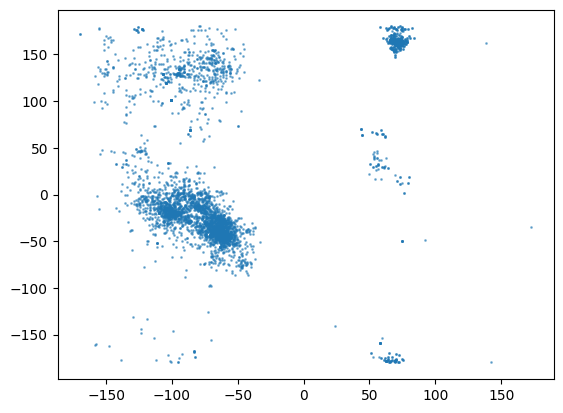

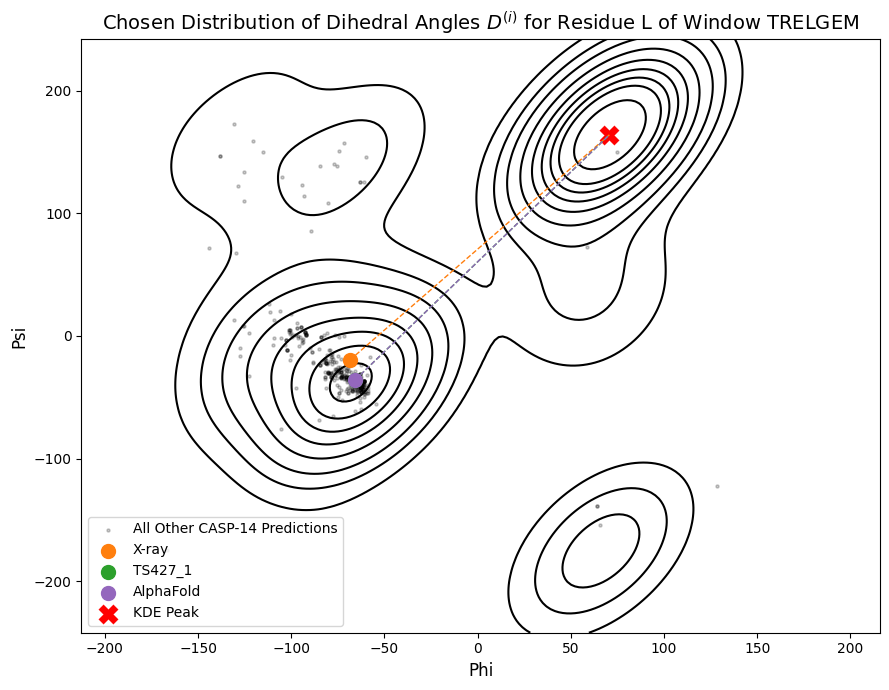

In [110]:
proteins = ['T1024', 'T1096', 'T1027', 'T1082', 'T1091', 'T1058', 'T1049', 'T1030', 'T1056', 'T1038', 'T1025', 'T1028']
da = DihedralAdherence(
    proteins[1], [4,5,6,7], PDBMINE_URL, PROJECT_DIR, kdews=[1,32,64,128], mode='kde'
)
# da.load_results()
da.load_results_da()
from lib.utils import get_phi_psi_dist

i = 9
seq = da.seqs[i]
seq = 'TRELGEM'
phi_psi_dist = get_phi_psi_dist(da.queries, seq)[0]
da.plot_one_dist_3d(seq)
plt.plot(phi_psi_dist['phi'], phi_psi_dist['psi'], 'o', markersize=1, alpha=0.5)
da.plot_da_for_seq(seq, pred_id=da.alphafold_id)

# New Method

Results already exist
Casp ID: T1096 	PDB: 7um1
Structure exists: 'pdb/pdb7um1.ent' 
Max: P(70.696379, 163.955432)=0.000080


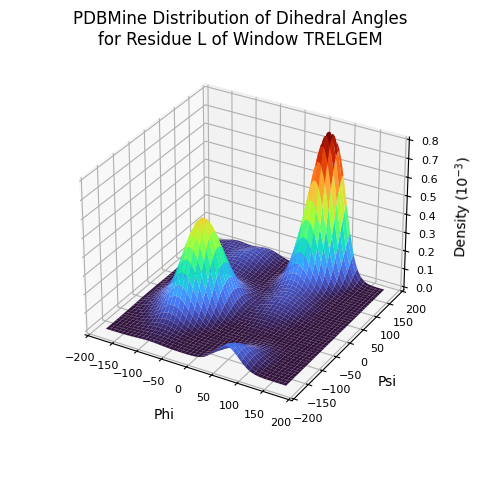

               phi          psi       weight      winsize
count  4513.000000  4513.000000  4513.000000  4513.000000
mean    -57.847662    15.629936     4.362508     4.107467
std      58.413662    84.198952    10.273638     0.320985
min    -169.600000  -179.800000     1.000000     4.000000
25%     -94.500000   -39.300000     1.000000     4.000000
50%     -69.400000   -19.400000     1.000000     4.000000
75%     -58.500000    98.600000     1.000000     4.000000
max     172.800000   179.900000   128.000000     7.000000
Residue L of Window TRELGEM centered at 76 of TRELGEM
	Win 4: ELGE - 4040 samples
	Win 5: RELGE - 465 samples
	Win 6: RELGEM - 4 samples
	Win 7: TRELGEM - 4 samples
	Found 5 Clusters
	KDEPEAK: Using kdepeak of cluster 1
Ideal:	 (-63.68, -41.62)
X-ray[76]:	 (-68.55, -19.62), DA=22.53
TS427_1[367]:	 (-65.80, -35.91), DA=6.09
AlphaFold[367]:	 (-65.80, -35.91), DA=6.09
Other Predictions DA:
                 0
count  418.000000
mean    30.004757
std     43.883936
min      0.1771

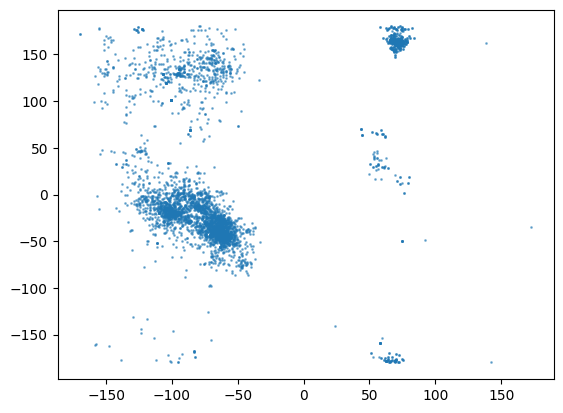

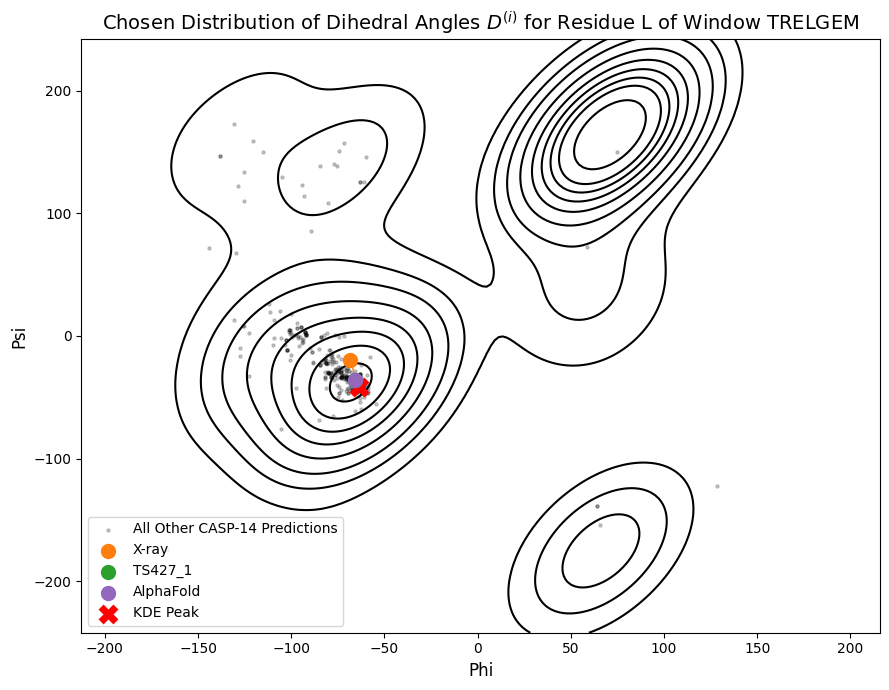

(4513, 5)

In [111]:
from lib.utils import get_phi_psi_dist

da = DihedralAdherence(
    proteins[1], [4,5,6,7], PDBMINE_URL, PROJECT_DIR, kdews=[1,32,64,128], mode='kde_af'
)
da.load_results_da()

i = 9
seq = da.seqs[i]
seq = 'TRELGEM'
phi_psi_dist = get_phi_psi_dist(da.queries, seq)[0]
da.plot_one_dist_3d(seq)
plt.plot(phi_psi_dist['phi'], phi_psi_dist['psi'], 'o', markersize=1, alpha=0.5)
da.plot_da_for_seq(seq, pred_id=da.alphafold_id)

phi_psi_dist.shape

(4513, 5)
	Found 5 Clusters
	KDEPEAK: Using kdepeak of cluster 1


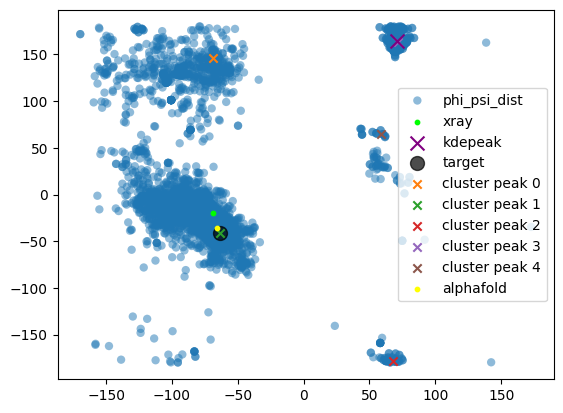

In [116]:
from sklearn.cluster import KMeans
from lib.utils import calc_da_for_one, calc_da, find_kdepeak_af, get_phi_psi_dist

# i = 5
# seq = da.seqs[i]
phi_psi_dist = get_phi_psi_dist(da.queries, seq)[0]
print(phi_psi_dist.shape)

af = da.phi_psi_predictions[(da.phi_psi_predictions.protein_id == da.alphafold_id) & (da.phi_psi_predictions.seq_ctxt == seq)]
xray = da.xray_phi_psi[da.xray_phi_psi.seq_ctxt == seq]
target, kdepeak, cluster_peaks = find_kdepeak_af(phi_psi_dist, None, af, return_peaks=True)

plt.scatter(phi_psi_dist.phi, phi_psi_dist.psi, label='phi_psi_dist', alpha=0.5, edgecolors='none')
plt.scatter(xray.phi, xray.psi, label='xray', color='lime', zorder=15, s=10)
plt.scatter(kdepeak.phi, kdepeak.psi, label='kdepeak', color='purple', marker='x', zorder=10, s=100)
plt.scatter(target.phi, target.psi, label='target', s=100, c='black', alpha=0.7)
for i, peak in enumerate(cluster_peaks):
    plt.scatter(peak.phi, peak.psi, label=f'cluster peak {i}', marker='x')
plt.scatter(af.phi, af.psi, label='alphafold', s=10, c='yellow', zorder=10)
plt.legend()
plt.show()

In [ ]:
# PDBMINE_URL = os.getenv("PDBMINE_URL")
# PROJECT_DIR = 'tests'
# casp_protein_ids = ['T1024', 'T1096', 'T1027', 'T1082', 'T1091', 'T1058', 'T1049', 'T1030', 'T1056', 'T1038', 'T1025', 'T1028', 'T1053']

# xray_phi_psi = []
# af_phi_psi = []
# all_phi_psi = []
# for id in casp_protein_ids:
#     da = DihedralAdherence(id, [4,5,6,7], PDBMINE_URL, PROJECT_DIR, kdews=[1,32,64,128])
#     da.load_results_da()
#     xray_phi_psi.append(da.xray_phi_psi.dropna())
#     print(xray_phi_psi[-1].shape)
#     af_phi_psi.append(da.phi_psi_predictions[da.phi_psi_predictions.protein_id == da.alphafold_id].dropna())
#     print(af_phi_psi[-1].shape)
#     all_phi_psi.append(da.phi_psi_predictions.dropna())
#     print(all_phi_psi[-1].shape)

# xray_phi_psi = pd.concat(xray_phi_psi).reset_index(drop=True)
# af_phi_psi = pd.concat(af_phi_psi).reset_index(drop=True)
# all_phi_psi = pd.concat(all_phi_psi).reset_index(drop=True)

In [ ]:
# fig, ax = plt.subplots(figsize=(12, 6))
# sns.set_palette("pastel")
# sns.kdeplot(data=xray_phi_psi, x='da', fill=True, hue='protein_id', ax=ax, multiple="stack")
# ax.set_title('Distribution of Distance from X-ray Dihedral Angles to PDBMine Prediction')
# ax.set_xlabel('Distance')
# plt.show()

In [ ]:
# fig, ax = plt.subplots(figsize=(12, 6))
# sns.kdeplot(data=af_phi_psi, x='da', fill=True, hue='protein_id', ax=ax, multiple="stack")
# ax.set_title('Distribution of Distance from AlphaFold Dihedral Angles to PDBMine Prediction')
# ax.set_xlabel('Distance')
# plt.show()

In [ ]:
# all_phi_psi['target'] = all_phi_psi.protein_id.apply(lambda x: x[:5])
# fig, ax = plt.subplots(figsize=(12, 6))
# sns.kdeplot(data=all_phi_psi, x='da', fill=True, hue='target', ax=ax, multiple="stack")
# ax.set_title('Distribution of Distance from All Predicted Dihedral Angles to PDBMine Prediction')
# ax.set_xlabel('Distance')
# plt.show()

In [ ]:
# sns.set_palette('tab10')
# xray_phi_psi['Source'] = 'X-ray'
# af_phi_psi['Source'] = 'AlphaFold'
# all_phi_psi['Source'] = 'All Other Predictions'
# df = pd.concat([
#     xray_phi_psi.sample(3100), 
#     af_phi_psi.drop('da_na', axis=1).sample(3100),
#     all_phi_psi.sample(3100)
# ]).reset_index(drop=True)
# fig, ax = plt.subplots(figsize=(12, 6))
# sns.kdeplot(data=df, x='da', fill=True, hue='Source', ax=ax, common_norm=True)
# ax.set_title('Distribution of Distance from Dihedral Angles to PDBMine Prediction')
# ax.set_xlabel('Distance')
# plt.show()

In [5]:
da.grouped_preds.sort_values('RMS_CA', ascending=False)

,protein_id,da,da_std,da_na,Model,RMS_CA,target
3,T1024TS004_4,57.605254,68.887433,0.072139,T1024TS004_4,42.472,T1024
4,T1024TS004_5,57.568894,68.840358,0.072139,T1024TS004_5,40.057,T1024
83,T1024TS063_5,82.393884,69.765602,0.171642,T1024TS063_5,34.525,T1024
177,T1024TS196_1,52.967657,66.216820,0.077114,T1024TS196_1,32.525,T1024
278,T1024TS305_3,53.472808,63.258565,0.072139,T1024TS305_3,29.706,T1024
...,...,...,...,...,...,...,...
312,T1024TS328_2,54.390034,65.883039,0.300995,T1024TS328_2,3.297,T1024
96,T1024TS071_4,53.005595,63.617894,0.072139,T1024TS071_4,3.275,T1024
95,T1024TS071_3,53.723515,64.340071,0.072139,T1024TS071_3,3.267,T1024
427,T1024TS427_5,52.716178,64.989771,0.072139,T1024TS427_5,2.971,T1024


# Distance Distributions

In [ ]:
# # Plot for one protein
# casp_protein_id = 'T1024'
# da = DihedralAdherence(casp_protein_id, [4,5,6,7], PDBMINE_URL, PROJECT_DIR, kdews=[1,32,64,128])
# da.load_results_da()
# xray_phi_psi = da.xray_phi_psi.dropna().copy()
# good_id = da.grouped_preds.sort_values('RMS_CA').iloc[0].protein_id
# bad_id = da.grouped_preds.sort_values('RMS_CA').iloc[-1].protein_id
# good_phi_psi = da.phi_psi_predictions[da.phi_psi_predictions.protein_id == good_id].dropna().copy()
# bad_phi_psi = da.phi_psi_predictions[da.phi_psi_predictions.protein_id == bad_id].dropna().copy()
# sns.set_palette('tab10')
# rmsd_da = da.grouped_preds.set_index('protein_id').loc[[good_id, bad_id], ['da', 'RMS_CA']]
# xray_phi_psi['Source'] = 'X-ray: ' + r'$\overline{DA}$=' + f'{xray_phi_psi.da.sum():.2f}, RMSD=0'
# good_phi_psi['Source'] = 'AlphaFold: ' + r'$\overline{DA}$=' + f'{rmsd_da.loc[good_id].da:.2f}, RMSD={rmsd_da.loc[good_id].RMS_CA:.2f}'
# bad_phi_psi['Source'] = f'Group {bad_id[7:10]}: ' + r'$\overline{DA}$=' + f'{rmsd_da.loc[bad_id].da:.2f}, RMSD={rmsd_da.loc[bad_id].RMS_CA:.2f}'
# df = pd.concat([
#     xray_phi_psi, 
#     good_phi_psi.drop('da_na', axis=1),
#     bad_phi_psi.drop('da_na', axis=1)
# ]).reset_index(drop=True)
# fig, ax = plt.subplots(figsize=(12, 6))
# sns.kdeplot(data=df, x='da', fill=True, hue='Source', ax=ax, common_norm=False)
# ax.set_title(f'Distribution of Distance from Dihedral Angles to PDBMine Prediction for {casp_protein_id}')
# ax.set_xlabel('Distance')
# plt.show()

In [17]:
# def calc_dist(xray_phi_psi, pred_phi_psi):
#     df = pd.merge(xray_phi_psi, pred_phi_psi, on='seq_ctxt', suffixes=('_xray', '_pred'))
#     xray = df[['phi_xray', 'psi_xray']].values
#     pred = df[['phi_pred', 'psi_pred']].values
#     def diff(x1, x2):
#         d = np.abs(x1 - x2)
#         return np.minimum(d, 360-d)
#     dist = np.sqrt(diff(xray[:,0], pred[:,0])**2 + diff(xray[:,1], pred[:,1])**2)
#     pred_phi_psi['da_to_xray'] = dist
# calc_dist(xray_phi_psi, good_phi_psi)
# calc_dist(xray_phi_psi, bad_phi_psi)

In [ ]:
# fig, ax = plt.subplots(figsize=(12, 6))
# sns.kdeplot(data=good_phi_psi, x='da', y='da_to_xray', ax=ax, fill=True)
# sns.scatterplot(data=good_phi_psi, x='da', y='da_to_xray', ax=ax, color='blue', alpha=0.2, edgecolor=None)

# ax.set_title(f'Distance from Good Prediction to X-Ray vs Distance from X-Ray to PDBMine Prediction for {casp_protein_id}')
# ax.set_ylabel('Distance to X-Ray')
# ax.set_xlabel('Distance to PDBMine Prediction')
# ax.text(0.9, 0.9, f'RMSD=228.01', transform=ax.transAxes)
# # df = pd.concat([
# #     good_phi_psi.drop('da_na', axis=1),
# #     bad_phi_psi.drop('da_na', axis=1)
# # ]).reset_index(drop=True)
# # sns.kdeplot(data=df, x='da_to_xray', fill=True, hue='Source', ax=ax, common_norm=False)

Results already exist
Casp ID: T1024 	PDB: 6t1z
Structure exists: 'pdb/pdb6t1z.ent' 
Results already exist
Casp ID: T1096 	PDB: 7um1
Structure exists: 'pdb/pdb7um1.ent' 
Results already exist
Casp ID: T1027 	PDB: 7d2o
Structure exists: 'pdb/pdb7d2o.ent' 
Results already exist
Casp ID: T1082 	PDB: 7cn6
Structure exists: 'pdb/pdb7cn6.ent' 
Results already exist
Casp ID: T1091 	PDB: 7w6b
Structure exists: 'pdb/pdb7w6b.ent' 
Results already exist
Casp ID: T1058 	PDB: 7abw
Structure exists: 'pdb/pdb7abw.ent' 
Results already exist
Casp ID: T1049 	PDB: 6y4f
Structure exists: 'pdb/pdb6y4f.ent' 
Results already exist
Casp ID: T1030 	PDB: 6poo
Structure exists: 'pdb/pdb6poo.ent' 
Results already exist
Casp ID: T1056 	PDB: 6yj1
Structure exists: 'pdb/pdb6yj1.ent' 
Results already exist
Casp ID: T1038 	PDB: 6ya2
Structure exists: 'pdb/pdb6ya2.ent' 
Results already exist
Casp ID: T1025 	PDB: 6uv6
Structure exists: 'pdb/pdb6uv6.ent' 
Results already exist
Casp ID: T1028 	PDB: 6vqp
Structure exists:

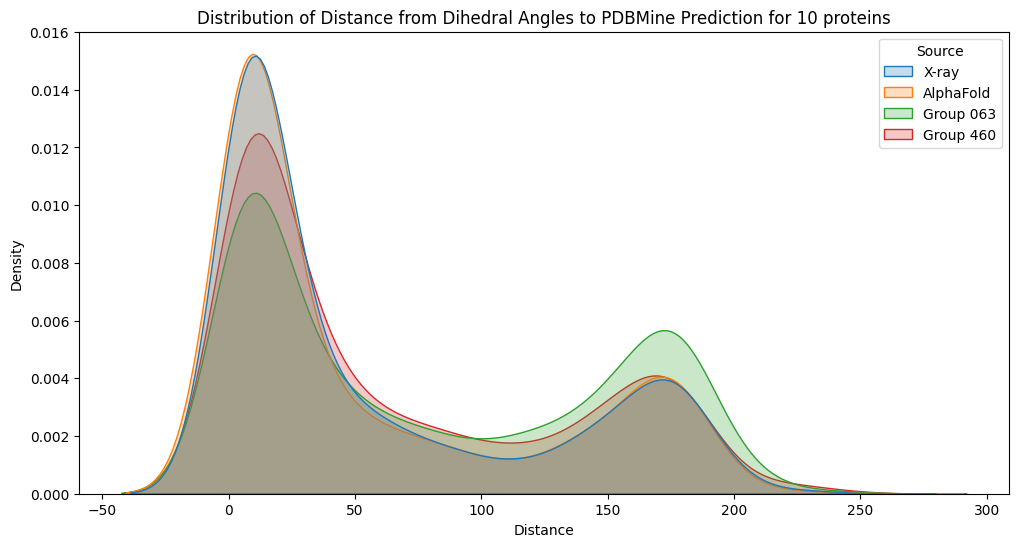

In [118]:
# Plot for one protein
ids = ['T1024', 'T1096', 'T1027', 'T1082', 'T1091', 'T1058', 'T1049', 'T1030', 'T1056', 'T1038', 'T1025', 'T1028']
xrays = []
afs = []
bads = []
bads_2 = []
protein_ids = None
for casp_protein_id in ids:
    da = DihedralAdherence(casp_protein_id, [4,5,6,7], PDBMINE_URL, PROJECT_DIR, kdews=[1,32,64,128])
    da.load_results_da()
    if protein_ids is None:
        protein_ids = set([i[7:] for i in da.protein_ids])
    else:
        protein_ids = protein_ids.intersection(set([i[7:] for i in da.protein_ids]))
    xray_phi_psi = da.xray_phi_psi.dropna().copy()
    good_phi_psi = da.phi_psi_predictions[da.phi_psi_predictions.protein_id == da.alphafold_id].dropna().copy()
    bad_phi_psi = da.phi_psi_predictions[da.phi_psi_predictions.protein_id == da.get_id('063_1')].dropna().copy()
    bad_phi_psi2 = da.phi_psi_predictions[da.phi_psi_predictions.protein_id == da.get_id('460_2')].dropna().copy()
    xrays.append(xray_phi_psi)
    afs.append(good_phi_psi)
    bads.append(bad_phi_psi)
    bads_2.append(bad_phi_psi2)
    sns.set_palette('tab10')
    # rmsd_da = da.grouped_preds.set_index('protein_id').loc[[good_id, bad_id], ['da', 'RMS_CA']]
xray_phi_psi = pd.concat(xrays).reset_index(drop=True)
good_phi_psi = pd.concat(afs).reset_index(drop=True)
bad_phi_psi = pd.concat(bads).reset_index(drop=True)
bad_phi_psi2 = pd.concat(bads_2).reset_index(drop=True)
xray_phi_psi['Source'] = 'X-ray'#: ' + r'$\overline{DA}$=' + f'{xray_phi_psi.da.sum():.2f}, RMSD=0'
good_phi_psi['Source'] = 'AlphaFold'#: ' + r'$\overline{DA}$=' + f'{rmsd_da.loc[good_id].da:.2f}, RMSD={rmsd_da.loc[good_id].RMS_CA:.2f}'
bad_phi_psi['Source'] = 'Group 063'#: ' + r'$\overline{DA}$=' + f'{rmsd_da.loc[bad_id].da:.2f}, RMSD={rmsd_da.loc[bad_id].RMS_CA:.2f}'
bad_phi_psi2['Source'] = 'Group 460'#: ' + r'$\overline{DA}$=' + f'{rmsd_da.loc[bad_id].da:.2f}, RMSD={rmsd_da.loc[bad_id].RMS_CA:.2f}'
df = pd.concat([
    xray_phi_psi, 
    good_phi_psi.drop('da_na', axis=1),
    bad_phi_psi.drop('da_na', axis=1),
    bad_phi_psi2.drop('da_na', axis=1)
]).reset_index(drop=True)
fig, ax = plt.subplots(figsize=(12, 6))
sns.kdeplot(data=df, x='da', fill=True, hue='Source', ax=ax, common_norm=False)
ax.set_title(f'Distribution of Distance from Dihedral Angles to PDBMine Prediction for 10 proteins')
ax.set_xlabel('Distance')
plt.show()

Text(0.5, 0, 'Distance From Prediction to X-Ray')

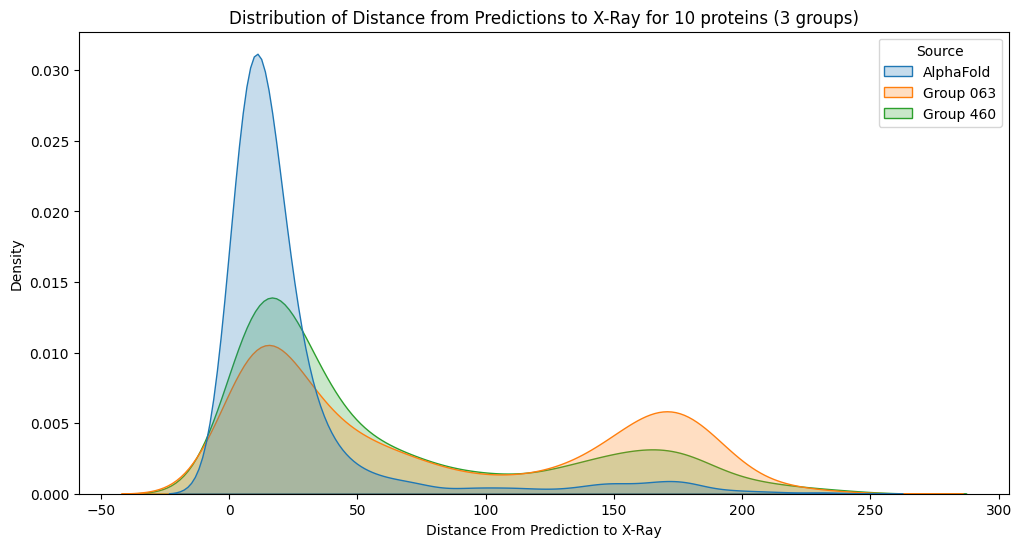

In [120]:
def calc_dist(xray_phi_psi, pred_phi_psi):
    df = pd.merge(xray_phi_psi, pred_phi_psi, on='seq_ctxt', suffixes=('_xray', '_pred'))
    xray = df[['phi_xray', 'psi_xray']].values
    pred = df[['phi_pred', 'psi_pred']].values
    def diff(x1, x2):
        d = np.abs(x1 - x2)
        return np.minimum(d, 360-d)
    dist = np.sqrt(diff(xray[:,0], pred[:,0])**2 + diff(xray[:,1], pred[:,1])**2)
    pred_phi_psi['da_to_xray'] = dist
calc_dist(xray_phi_psi, good_phi_psi)
calc_dist(xray_phi_psi, bad_phi_psi)
calc_dist(xray_phi_psi, bad_phi_psi2)

df = pd.concat([
    good_phi_psi.drop('da_na', axis=1),
    bad_phi_psi.drop('da_na', axis=1),
    bad_phi_psi2.drop('da_na', axis=1)
]).reset_index(drop=True)
fig, ax = plt.subplots(figsize=(12, 6))
sns.kdeplot(data=df, x='da_to_xray', fill=True, hue='Source', ax=ax, common_norm=False)
ax.set_title(f'Distribution of Distance from Predictions to X-Ray for 10 proteins (3 groups)')
ax.set_xlabel('Distance From Prediction to X-Ray')

Text(0.5, 0, 'Distance to PDBMine Prediction')

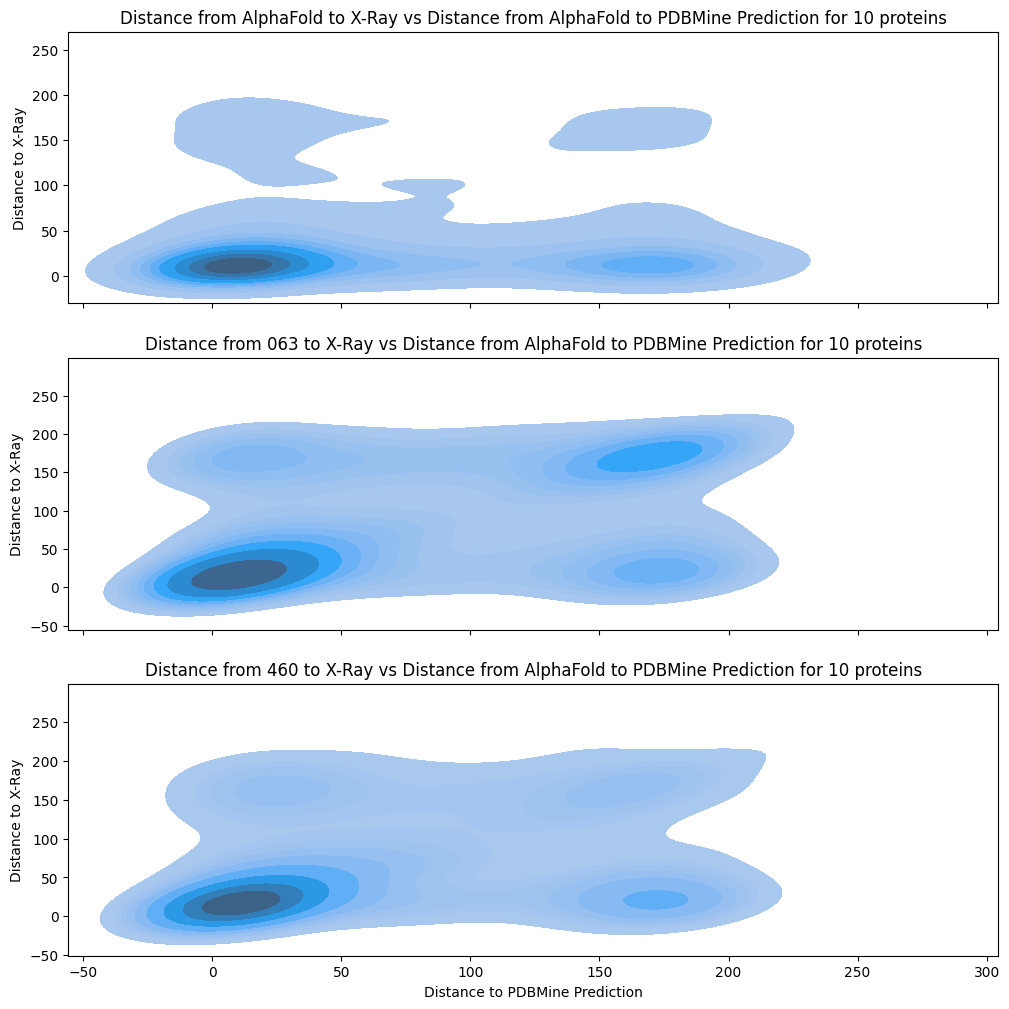

In [130]:
fig, axes = plt.subplots(3,1,figsize=(12, 12), sharex=True)
sns.kdeplot(data=good_phi_psi, x='da', y='da_to_xray', ax=axes[0], fill=True)
# sns.scatterplot(data=good_phi_psi, x='da', y='da_to_xray', ax=axes[0], color='blue', alpha=0.2, edgecolor=None, marker='.')

axes[0].set_title(f'Distance from AlphaFold to X-Ray vs Distance from AlphaFold to PDBMine Prediction for 10 proteins')
axes[0].set_ylabel('Distance to X-Ray')
# axes[0].set_xlabel('Distance to PDBMine Prediction')

sns.kdeplot(data=bad_phi_psi, x='da', y='da_to_xray', ax=axes[1], fill=True)
# sns.scatterplot(data=bad_phi_psi, x='da', y='da_to_xray', ax=axes[1], color='blue', alpha=0.2, edgecolor=None, marker='.')
axes[1].set_title(f'Distance from 063 to X-Ray vs Distance from AlphaFold to PDBMine Prediction for 10 proteins')
axes[1].set_ylabel('Distance to X-Ray')
# axes[1].set_xlabel('Distance to PDBMine Prediction')

sns.kdeplot(data=bad_phi_psi2, x='da', y='da_to_xray', ax=axes[2], fill=True)
# sns.scatterplot(data=bad_phi_psi2, x='da', y='da_to_xray', ax=axes[2], color='blue', alpha=0.2, edgecolor=None, marker='.')
axes[2].set_title(f'Distance from 460 to X-Ray vs Distance from AlphaFold to PDBMine Prediction for 10 proteins')
axes[2].set_ylabel('Distance to X-Ray')
axes[2].set_xlabel('Distance to PDBMine Prediction')

# New Method

Results already exist
Casp ID: T1024 	PDB: 6t1z
Structure exists: 'pdb/pdb6t1z.ent' 
Results already exist
Casp ID: T1096 	PDB: 7um1
Structure exists: 'pdb/pdb7um1.ent' 
Results already exist
Casp ID: T1027 	PDB: 7d2o
Structure exists: 'pdb/pdb7d2o.ent' 
Results already exist
Casp ID: T1082 	PDB: 7cn6
Structure exists: 'pdb/pdb7cn6.ent' 
Results already exist
Casp ID: T1091 	PDB: 7w6b
Structure exists: 'pdb/pdb7w6b.ent' 
Results already exist
Casp ID: T1058 	PDB: 7abw
Structure exists: 'pdb/pdb7abw.ent' 
Results already exist
Casp ID: T1049 	PDB: 6y4f
Structure exists: 'pdb/pdb6y4f.ent' 
Results already exist
Casp ID: T1030 	PDB: 6poo
Structure exists: 'pdb/pdb6poo.ent' 
Results already exist
Casp ID: T1056 	PDB: 6yj1
Structure exists: 'pdb/pdb6yj1.ent' 
Results already exist
Casp ID: T1038 	PDB: 6ya2
Structure exists: 'pdb/pdb6ya2.ent' 
Results already exist
Casp ID: T1025 	PDB: 6uv6
Structure exists: 'pdb/pdb6uv6.ent' 
Results already exist
Casp ID: T1028 	PDB: 6vqp
Structure exists:

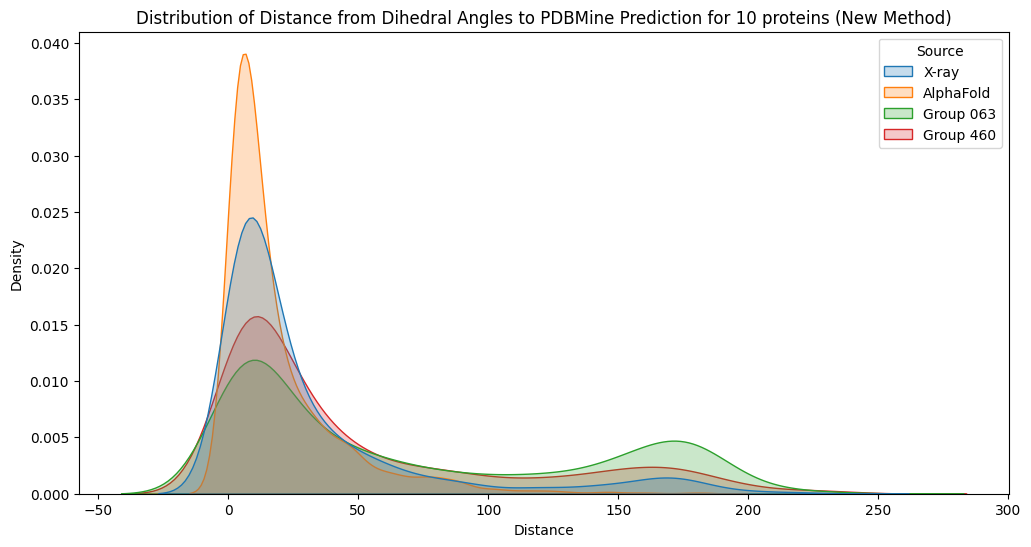

In [131]:
# Plot for one protein
ids = ['T1024', 'T1096', 'T1027', 'T1082', 'T1091', 'T1058', 'T1049', 'T1030', 'T1056', 'T1038', 'T1025', 'T1028']
xrays = []
afs = []
bads = []
bads_2 = []
protein_ids = None
for casp_protein_id in ids:
    da = DihedralAdherence(casp_protein_id, [4,5,6,7], PDBMINE_URL, PROJECT_DIR, kdews=[1,32,64,128], mode='kde_af')
    da.load_results_da()
    if protein_ids is None:
        protein_ids = set([i[7:] for i in da.protein_ids])
    else:
        protein_ids = protein_ids.intersection(set([i[7:] for i in da.protein_ids]))
    xray_phi_psi = da.xray_phi_psi.dropna().copy()
    good_phi_psi = da.phi_psi_predictions[da.phi_psi_predictions.protein_id == da.alphafold_id].dropna().copy()
    bad_phi_psi = da.phi_psi_predictions[da.phi_psi_predictions.protein_id == da.get_id('063_1')].dropna().copy()
    bad_phi_psi2 = da.phi_psi_predictions[da.phi_psi_predictions.protein_id == da.get_id('460_2')].dropna().copy()
    xrays.append(xray_phi_psi)
    afs.append(good_phi_psi)
    bads.append(bad_phi_psi)
    bads_2.append(bad_phi_psi2)
    sns.set_palette('tab10')
    # rmsd_da = da.grouped_preds.set_index('protein_id').loc[[good_id, bad_id], ['da', 'RMS_CA']]
xray_phi_psi = pd.concat(xrays).reset_index(drop=True)
good_phi_psi = pd.concat(afs).reset_index(drop=True)
bad_phi_psi = pd.concat(bads).reset_index(drop=True)
bad_phi_psi2 = pd.concat(bads_2).reset_index(drop=True)
xray_phi_psi['Source'] = 'X-ray'#: ' + r'$\overline{DA}$=' + f'{xray_phi_psi.da.sum():.2f}, RMSD=0'
good_phi_psi['Source'] = 'AlphaFold'#: ' + r'$\overline{DA}$=' + f'{rmsd_da.loc[good_id].da:.2f}, RMSD={rmsd_da.loc[good_id].RMS_CA:.2f}'
bad_phi_psi['Source'] = 'Group 063'#: ' + r'$\overline{DA}$=' + f'{rmsd_da.loc[bad_id].da:.2f}, RMSD={rmsd_da.loc[bad_id].RMS_CA:.2f}'
bad_phi_psi2['Source'] = 'Group 460'#: ' + r'$\overline{DA}$=' + f'{rmsd_da.loc[bad_id].da:.2f}, RMSD={rmsd_da.loc[bad_id].RMS_CA:.2f}'
df = pd.concat([
    xray_phi_psi, 
    good_phi_psi.drop('da_na', axis=1),
    bad_phi_psi.drop('da_na', axis=1),
    bad_phi_psi2.drop('da_na', axis=1)
]).reset_index(drop=True)
fig, ax = plt.subplots(figsize=(12, 6))
sns.kdeplot(data=df, x='da', fill=True, hue='Source', ax=ax, common_norm=False)
ax.set_title(f'Distribution of Distance from Dihedral Angles to PDBMine Prediction for 10 proteins (New Method)')
ax.set_xlabel('Distance')
plt.show()

In [135]:
def calc_dist(xray_phi_psi, pred_phi_psi):
    df = pd.merge(xray_phi_psi, pred_phi_psi, on='seq_ctxt', suffixes=('_xray', '_pred'))
    xray = df[['phi_xray', 'psi_xray']].values
    pred = df[['phi_pred', 'psi_pred']].values
    def diff(x1, x2):
        d = np.abs(x1 - x2)
        return np.minimum(d, 360-d)
    dist = np.sqrt(diff(xray[:,0], pred[:,0])**2 + diff(xray[:,1], pred[:,1])**2)
    pred_phi_psi['da_to_xray'] = dist
calc_dist(xray_phi_psi, good_phi_psi)
calc_dist(xray_phi_psi, bad_phi_psi)
calc_dist(xray_phi_psi, bad_phi_psi2)

df = pd.concat([
    good_phi_psi.drop('da_na', axis=1),
    bad_phi_psi.drop('da_na', axis=1),
    bad_phi_psi2.drop('da_na', axis=1)
]).reset_index(drop=True)
# fig, ax = plt.subplots(figsize=(12, 6))
# sns.kdeplot(data=df, x='da_to_xray', fill=True, hue='Source', ax=ax, common_norm=False)
# ax.set_title(f'Distribution of Distance from Predictions to X-Ray for 10 proteins (3 groups) (New Method)')
# ax.set_xlabel('Distance From Prediction to X-Ray')

Text(0.5, 0, 'Distance to PDBMine Prediction')

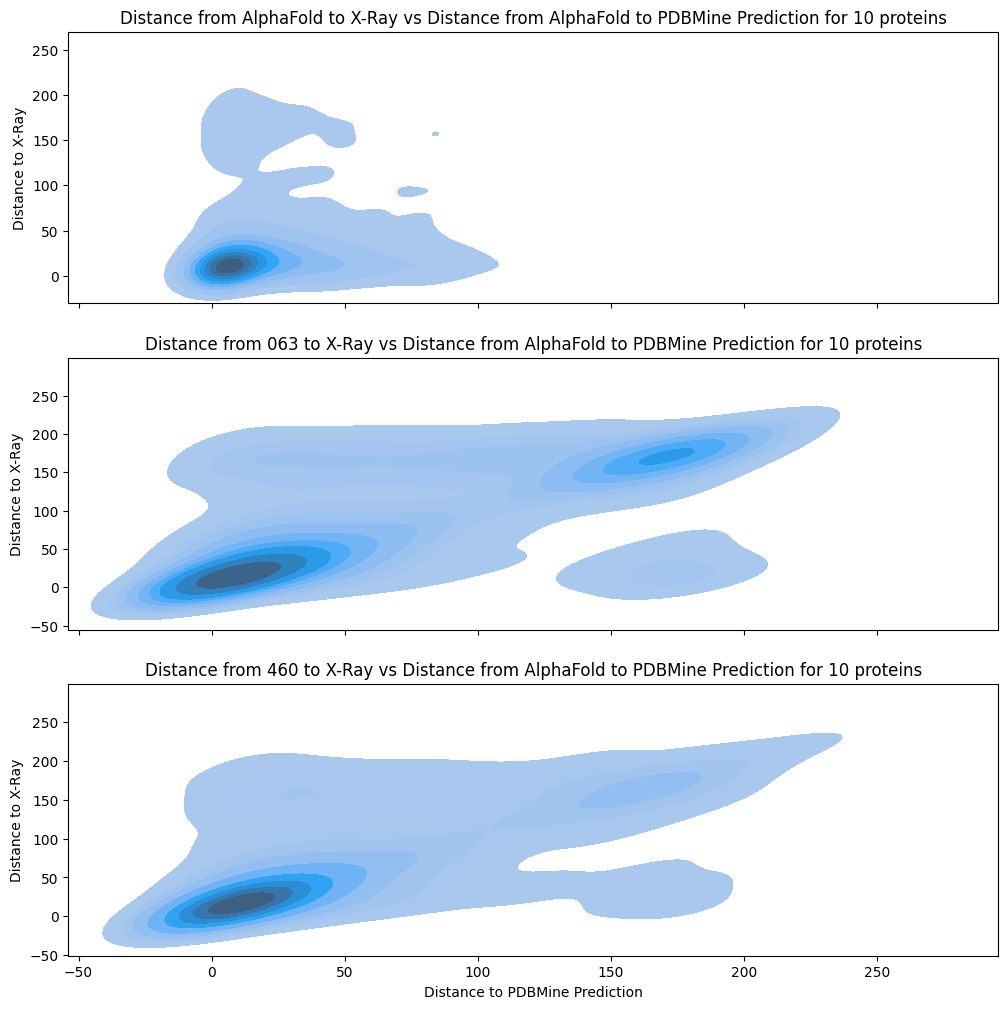

In [137]:
fig, axes = plt.subplots(3,1,figsize=(12, 12), sharex=True)
sns.kdeplot(data=good_phi_psi, x='da', y='da_to_xray', ax=axes[0], fill=True)
# sns.scatterplot(data=good_phi_psi, x='da', y='da_to_xray', ax=axes[0], color='blue', alpha=0.2, edgecolor=None, marker='.')

axes[0].set_title(f'Distance from AlphaFold to X-Ray vs Distance from AlphaFold to PDBMine Prediction for 10 proteins')
axes[0].set_ylabel('Distance to X-Ray')
# axes[0].set_xlabel('Distance to PDBMine Prediction')

sns.kdeplot(data=bad_phi_psi, x='da', y='da_to_xray', ax=axes[1], fill=True)
# sns.scatterplot(data=bad_phi_psi, x='da', y='da_to_xray', ax=axes[1], color='blue', alpha=0.2, edgecolor=None, marker='.')
axes[1].set_title(f'Distance from 063 to X-Ray vs Distance from AlphaFold to PDBMine Prediction for 10 proteins')
axes[1].set_ylabel('Distance to X-Ray')
# axes[1].set_xlabel('Distance to PDBMine Prediction')

sns.kdeplot(data=bad_phi_psi2, x='da', y='da_to_xray', ax=axes[2], fill=True)
# sns.scatterplot(data=bad_phi_psi2, x='da', y='da_to_xray', ax=axes[2], color='blue', alpha=0.2, edgecolor=None, marker='.')
axes[2].set_title(f'Distance from 460 to X-Ray vs Distance from AlphaFold to PDBMine Prediction for 10 proteins')
axes[2].set_ylabel('Distance to X-Ray')
axes[2].set_xlabel('Distance to PDBMine Prediction')